In [1]:
import psana as ps
import numpy as np

from psmon.plots import Image
import matplotlib.pyplot as plt

In [20]:
ds = ps.DataSource('exp=cxic00318:run=200')
detNames = ps.DetNames()

In [21]:
for detName in detNames:
    print detName

('CxiEndstation.0:Acqiris.0', 'Acqiris', '')
('NoDetector.0:Evr.2', 'evr2', '')
('NoDetector.0:Evr.1', 'evr1', '')
('CxiDs1.0:Wave8.0', 'CXI-DG2-BMMON-WF', '')
('EBeam', '', '')
('FEEGasDetEnergy', '', '')
('CxiDsu.0:Opal1000.0', 'Timetool', '')
('CxiDs1.0:Jungfrau.0', 'jungfrau4M', '')
('ControlData', '', '')


In [22]:
print type(None)

<type 'NoneType'>


In [27]:
det = ps.Detector('EBeam')
energy = []
for nevt, evt in enumerate(ds.events()):
    event = det.get(evt)
    if nevt==1000:
        break
    try:
        toAppend = event.ebeamCharge()
    except Exception:
        toAppend = None
    if nevt==0:
        print toAppend
    energy.append(toAppend)

0.252688704307


(1000,)


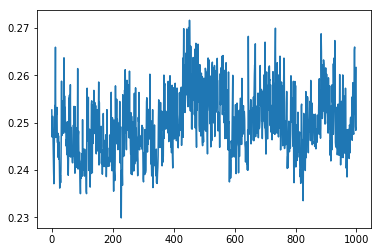

In [28]:
energy = np.array(energy)
print energy.shape

plt.figure()
plt.plot(energy)
plt.show()

# avg = np.mean(energy, axis=0)
# plt.figure(figsize=(15,5))
# plt.imshow(energy[0])
# plt.show()

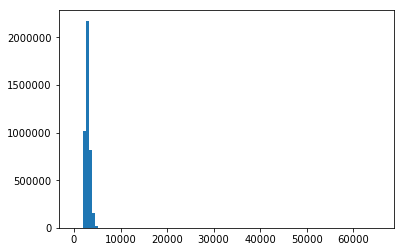

0 9985 (3, 201, 741)
120 9993 (1, 395, 501)
240 9798 (2, 56, 316)
360 9972 (1, 225, 495)
480 9995 (1, 290, 526)
600 9981 (6, 167, 944)
720 9955 (6, 174, 151)
840 9990 (1, 45, 737)
960 9998 (7, 506, 572)
1080 9939 (0, 271, 87)
1200 9989 (2, 179, 418)
1320 9976 (6, 174, 151)
1440 9965 (6, 174, 151)
1560 9956 (1, 413, 172)
1680 9976 (6, 39, 490)
1800 9989 (2, 164, 173)
1920 9979 (6, 174, 151)
2040 10000 (5, 91, 460)
2160 9995 (2, 392, 739)
2280 9887 (6, 174, 151)
2400 9980 (6, 174, 151)
2520 9997 (1, 45, 737)
2640 9986 (4, 132, 176)
2760 9993 (4, 146, 502)
2880 9892 (5, 469, 914)
3000 9985 (5, 91, 460)
3120 9962 (4, 255, 512)
3240 9978 (5, 91, 460)
3360 9996 (4, 132, 176)
3480 9915 (6, 174, 151)
3600 9976 (4, 132, 176)
3720 9999 (5, 91, 460)
3840 9949 (1, 445, 402)
3960 9985 (1, 57, 683)
4080 9985 (5, 91, 460)
4200 9910 (7, 256, 768)
4320 9973 (5, 91, 460)
4440 9972 (5, 91, 460)
4560 10000 (7, 256, 904)
4680 9989 (4, 132, 176)
4800 9973 (4, 146, 502)
4920 9951 (4, 103, 512)


In [85]:
jungfrau = ps.Detector('jungfrau4M')
n = 5000
summed_image = np.zeros((8,512,1024))
events = ds.events()
evt = next(events)
image = jungfrau.raw(evt).flatten()
plt.figure()
plt.hist(image, bins=100)
plt.show()

for nevt, evt in enumerate(ds.events()):
    next_image = np.copy(jungfrau.raw(evt))
    next_image[next_image>10000]=0
    if next_image.shape==summed_image.shape:
        summed_image+=np.copy(next_image)
    if nevt%120==0:
        print nevt, next_image.max(), np.unravel_index(next_image.argmax(), next_image.shape)
    if nevt==n-1:
        break
square_image = summed_image.reshape((2048,2048))

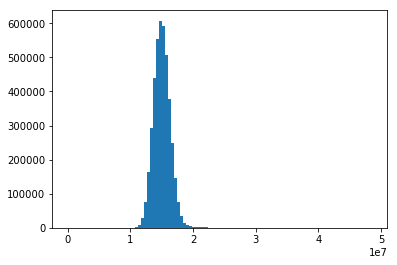

48552969.0
0.0


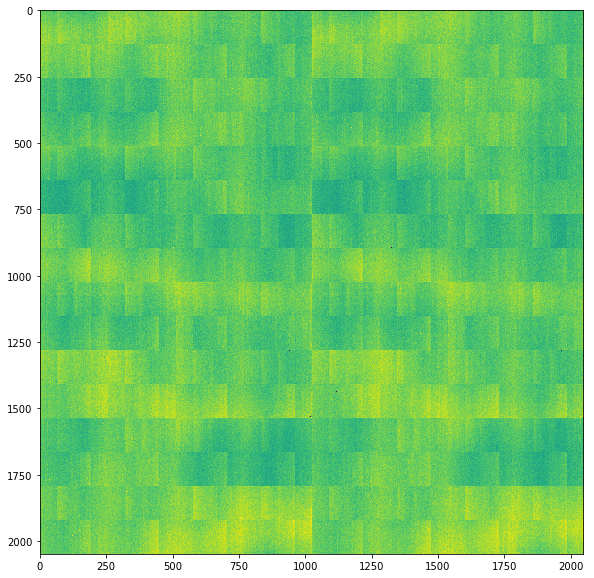

In [92]:
plt.figure()
plt.hist(square_image.flatten(), bins=100)
plt.show()

print square_image.max()
print im.min()
im = np.copy(square_image)
m=2e7
im[im>m]=m
plt.figure(figsize=(12,10))
plt.imshow(im)
plt.show()